<a href="https://colab.research.google.com/github/gagatadi/machine-learning/blob/main/last%20exam_Exploring%20MNIST%20Dataset%20using%20PyTorch%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sklearn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time
torch.manual_seed(101)

In [2]:
Transform = transforms.ToTensor()
train = datasets.MNIST(root='../DATA', train=True, download=True, transform=Transform)
train

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../DATA/MNIST/raw/train-images-idx3-ubyte.gz to ../DATA/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../DATA/MNIST/raw/train-labels-idx1-ubyte.gz to ../DATA/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to ../DATA/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../DATA/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: ../DATA
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
test = datasets.MNIST(root='../DATA', train=False, download=True, transform=Transform)
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

In [4]:
image, label = train[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


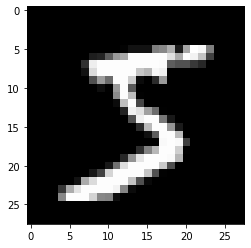

In [5]:
plt.imshow(image.reshape((28,28)), cmap="gray")

In [6]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)

test_loader = DataLoader(test, batch_size=500, shuffle=False)

In [7]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size=784, output_size=10, layers=[120,84]):
    super().__init__()
    self.d1 = nn.Linear(input_size,layers[0])
    self.d2 = nn.Linear(layers[0],layers[1])
    self.d3 = nn.Linear(layers[1], output_size)

  def forward(self, X):
    X = F.relu(self.d1(X))
    X = F.relu(self.d2(X))
    X = self.d3(X)
    return F.log_softmax(X, dim=1)

In [8]:
model = MultilayerPerceptron()
print(model)

MultilayerPerceptron(
  (d1): Linear(in_features=784, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
for images, labels in train_loader:
  print('Initial Batch shape:', images.size())
  break
print('Batch shape after flattening', images.view(100,-1).size())

Initial Batch shape: torch.Size([100, 1, 28, 28])
Batch shape after flattening torch.Size([100, 784])


In [11]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Run the training batches
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1

    # Apply the model
    y_pred = model(X_train.view(100, -1))
    loss = criterion(y_pred, y_train)

    # Calculate the number of correct predictions
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update parametes
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print interim results
    if b%600 == 0:
      print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000] Train loss:{loss.item():10.8f} Train accuracy: {trn_corr.item()*10/(10*b):7.3f}%')

      # Update train loss & accuracy for the epoch
      train_losses.append(loss)
      train_correct.append(trn_corr)

      # Run the testing batches
      with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

          # Apply the model
          y_val = model(X_test.view(500, -1))

          # Tally the number of correct predictions
          predicted = torch.max(y_val.data, 1)[1]
          tst_corr += (predicted == y_test).sum()

epoch:  0  batch:  600 [ 60000/60000] Train loss:0.18150850 Train accuracy:  89.318%
epoch:  1  batch:  600 [ 60000/60000] Train loss:0.14283663 Train accuracy:  95.250%
epoch:  2  batch:  600 [ 60000/60000] Train loss:0.10772718 Train accuracy:  96.580%
epoch:  3  batch:  600 [ 60000/60000] Train loss:0.07516333 Train accuracy:  97.418%
epoch:  4  batch:  600 [ 60000/60000] Train loss:0.10151499 Train accuracy:  97.995%
epoch:  5  batch:  600 [ 60000/60000] Train loss:0.04482558 Train accuracy:  98.352%
epoch:  6  batch:  600 [ 60000/60000] Train loss:0.02749510 Train accuracy:  98.665%
epoch:  7  batch:  600 [ 60000/60000] Train loss:0.04334242 Train accuracy:  98.868%
epoch:  8  batch:  600 [ 60000/60000] Train loss:0.03857255 Train accuracy:  99.093%
epoch:  9  batch:  600 [ 60000/60000] Train loss:0.00946090 Train accuracy:  99.227%


In [14]:
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # Test accuracy for the last epoch

IndexError: ignored

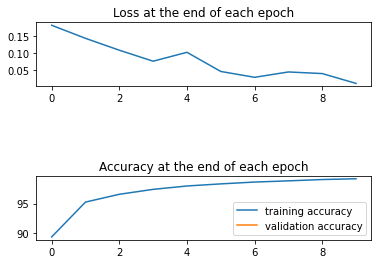

In [15]:
plt.subplot(3, 1, 1)
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')

plt.subplot(3, 1, 3)
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/600 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')

plt.legend()